In [1]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision.transforms.functional import to_pil_image, to_tensor

from dct_autoencoder import (
    DCTAutoencoder,
    DCTBasis,
    get_dct_basis,
    visualize_dct_basis_functions,
)

## Basis

dct_basis.basis_functions.shape=(8, 8, 8, 8)
dct_basis.spatial_frequencies_components.shape=(8, 8, 2)
dct_basis.spatial_frequencies_magnitude.shape=(8, 8)
dct_basis.multiplication_factor_matrix.shape=(8, 8)
dct_basis.multiplication_factor_scalar=0.25
dct_basis.block_size=8


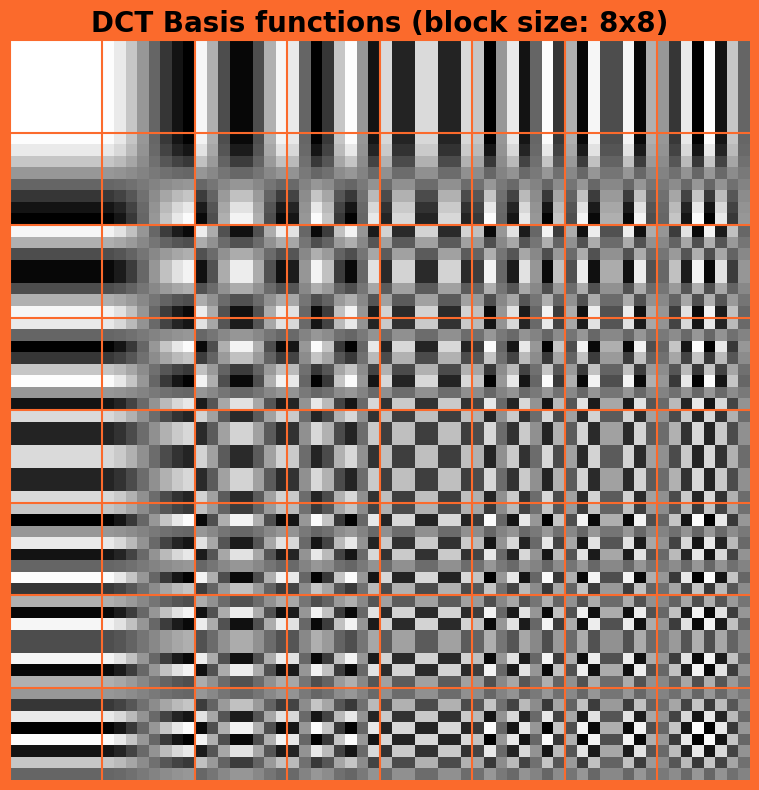

In [2]:
dct_basis: DCTBasis = get_dct_basis(block_size=8)
print(f"{dct_basis.basis_functions.shape=}")
print(f"{dct_basis.spatial_frequencies_components.shape=}")
print(f"{dct_basis.spatial_frequencies_magnitude.shape=}")
print(f"{dct_basis.multiplication_factor_matrix.shape=}")
print(f"{dct_basis.multiplication_factor_scalar=}")
print(f"{dct_basis.block_size=}")
fig, ax = visualize_dct_basis_functions(dct_basis)
plt.show()

## DCTAutoEncoder

In [3]:
dct_autoencoder = DCTAutoencoder(block_size=8)
isinstance(dct_autoencoder, torch.nn.Module)

True

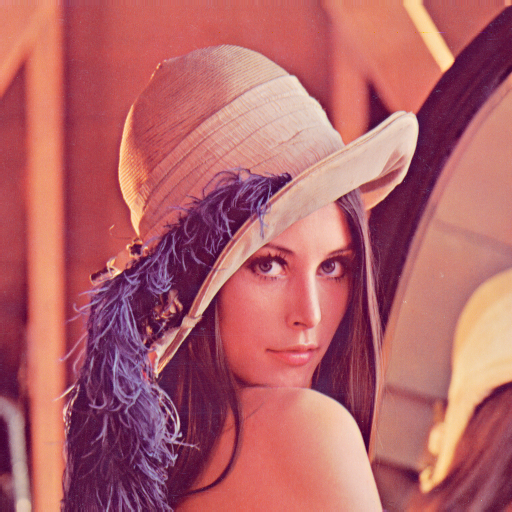

In [4]:
image = Image.open("assets/test_images/Lenna_(test_image).png")
image

### Encoding

In [5]:
image_tensor = to_tensor(image)
print(f"{image_tensor.shape=}")
batch = image_tensor.unsqueeze(0)
dct_encodings = dct_autoencoder.encode(batch)
print(f"{dct_encodings.shape=}")

image_tensor.shape=torch.Size([3, 512, 512])
dct_encodings.shape=torch.Size([1, 192, 64, 64])


### Decoding

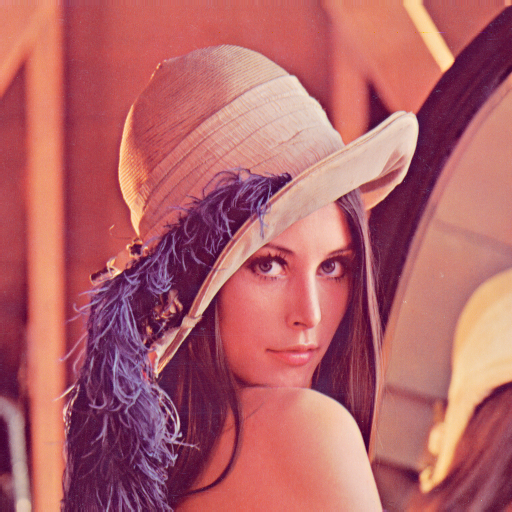

In [6]:
reconstructed_batch = dct_autoencoder.decode(dct_encodings)
reconstructed_image = reconstructed_batch.squeeze(0)
torch.testing.assert_close(batch, reconstructed_batch, rtol=1e-3, atol=1e-3)
to_pil_image(reconstructed_image)

### Compress

In [7]:
luminance_compression_ratio: float = 1 / 2
chrominance_compression_ratio: float = 1 / 4

In [8]:
compressed_dct_encodings = dct_autoencoder.compress(
    dct_encodings,
    luminance_compression_ratio,
    chrominance_compression_ratio,
)
print(f"{compressed_dct_encodings.shape=}")
compression_ratio = dct_encodings.numel() / compressed_dct_encodings.numel()
print(f"{compression_ratio=}")

compressed_dct_encodings.shape=torch.Size([1, 64, 64, 64])
compression_ratio=3.0


## Decompress

decompressed_dct_encodings.shape=torch.Size([1, 192, 64, 64])


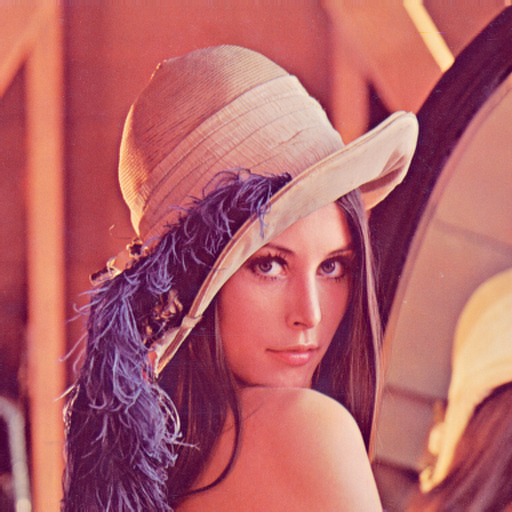

In [9]:
decompressed_dct_encodings = dct_autoencoder.decompress(
    compressed_dct_encodings,
    luminance_compression_ratio,
    chrominance_compression_ratio,
)
print(f"{decompressed_dct_encodings.shape=}")
decompressed_batch = dct_autoencoder.decode(decompressed_dct_encodings)
decompressed_image = decompressed_batch.squeeze(0)
to_pil_image(decompressed_image)